In [ ]:
import pandas as pd

# Load your distance data
df = pd.read_csv("/Users/hariprasannaa/Downloads/distance.csv",
                 header=0, names=["Sensor-A", "Sensor-B", "Distance"])

# Get all unique sensor IDs
unique_sensors = pd.unique(df[['Sensor-A', 'Sensor-B']].values.ravel())

In [23]:
from sklearn.manifold import MDS
import numpy as np

# Create a distance matrix
sensor_to_index = {sensor: i for i, sensor in enumerate(unique_sensors)}
n = len(unique_sensors)
distance_matrix = np.zeros((n, n))

for _, row in df.iterrows():
    i = sensor_to_index[row['Sensor-A']]
    j = sensor_to_index[row['Sensor-B']]
    distance_matrix[i, j] = row['Distance']
    distance_matrix[j, i] = row['Distance']  # make it symmetric

# Use MDS to project into 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
positions_2d = mds.fit_transform(distance_matrix)

In [24]:
positions_2d

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.41001736e+03,  7.17664898e+01],
       [ 4.88086154e+02, -2.06849510e+03],
       [ 1.17178310e+02,  2.31397997e+03],
       [ 1.41313714e+02,  1.40715539e+03],
       [ 6.83504837e+01,  6.96772436e+02],
       [ 9.24526709e+02, -1.87784940e+03],
       [-1.17898518e+03,  1.90709227e+02],
       [-1.67699606e+02,  1.93145558e+03],
       [ 7.65273432e+02,  9.99195666e+02],
       [ 1.31641263e+01,  7.98013577e+02],
       [-1.26131002e+03, -8.15564260e+02],
       [-1.50145933e+03,  1.02322311e+03],
       [ 2.31188101e+03,  2.75218406e+02],
       [ 2.33816597e+02,  1.21328846e+03],
       [-1.61527291e+03,  7.26382624e+02],
       [-9.88194616e+01,  1.52047606e+03],
       [ 1.96535930e+03,  8.12183024e+02],
       [ 7.45290649e+02,  1.78781985e+03],
       [ 2.32835386e+02,  1.19648334e+03],
       [-1.63507036e+03, -3.09910699e+02],
       [-5.81043915e+02,  1.09491824e+03],
       [-1.

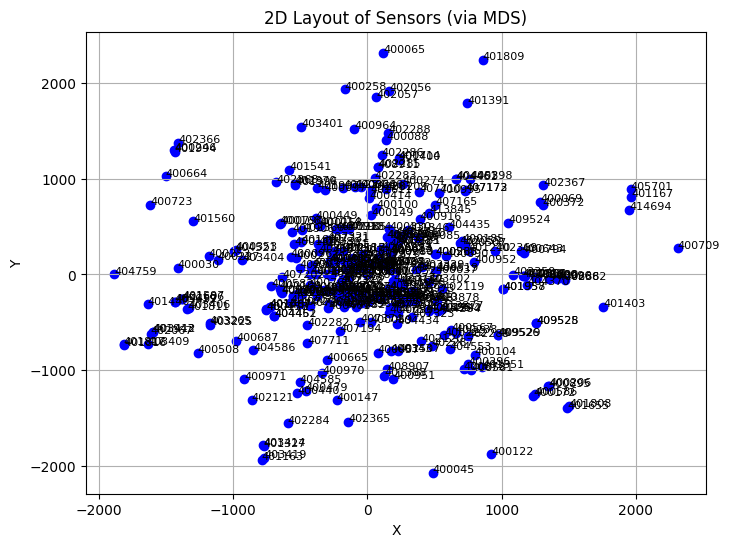

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i, coord in enumerate(positions_2d):
    plt.scatter(coord[0], coord[1], color='blue')
    plt.text(coord[0], coord[1], str(unique_sensors[i]), fontsize=8)

plt.title("2D Layout of Sensors (via MDS)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize to [0, 1] and scale to grid size
grid_size = 20  # You can try 16, 32, etc.
scaler = MinMaxScaler()
grid_positions = scaler.fit_transform(positions_2d)
grid_indices = (grid_positions * (grid_size - 1)).astype(int)

# Map sensor ID to its grid position
sensor_grid_positions = {
    sensor_id: (x, y)
    for sensor_id, (x, y) in zip(unique_sensors, grid_indices)
}

In [27]:
sensor_grid_positions

{np.int64(400001): (np.int64(8), np.int64(8)),
 np.int64(400017): (np.int64(8), np.int64(8)),
 np.int64(400030): (np.int64(2), np.int64(9)),
 np.int64(400045): (np.int64(10), np.int64(0)),
 np.int64(400065): (np.int64(9), np.int64(19)),
 np.int64(400088): (np.int64(9), np.int64(15)),
 np.int64(400100): (np.int64(8), np.int64(11)),
 np.int64(400122): (np.int64(12), np.int64(0)),
 np.int64(400253): (np.int64(3), np.int64(9)),
 np.int64(400258): (np.int64(7), np.int64(17)),
 np.int64(400298): (np.int64(11), np.int64(13)),
 np.int64(400414): (np.int64(8), np.int64(12)),
 np.int64(400508): (np.int64(2), np.int64(5)),
 np.int64(400664): (np.int64(1), np.int64(13)),
 np.int64(400709): (np.int64(19), np.int64(10)),
 np.int64(400714): (np.int64(9), np.int64(14)),
 np.int64(400723): (np.int64(1), np.int64(12)),
 np.int64(400964): (np.int64(8), np.int64(15)),
 np.int64(401167): (np.int64(17), np.int64(12)),
 np.int64(401391): (np.int64(11), np.int64(16)),
 np.int64(401400): (np.int64(9), np.int64

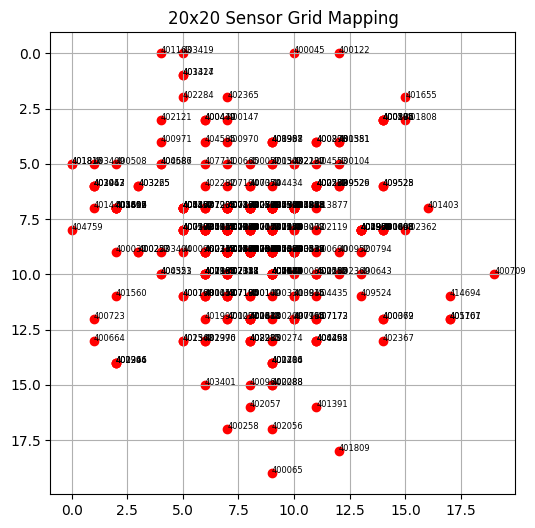

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for sensor_id, (x, y) in sensor_grid_positions.items():
    plt.scatter(x, y, color='red')
    plt.text(x, y, str(sensor_id), fontsize=6)
plt.title(f'{grid_size}x{grid_size} Sensor Grid Mapping')
plt.gca().invert_yaxis()  # Makes grid match image-style top-down layout
plt.grid(True)
plt.show()

In [ ]:
def create_heatmap(sensor_values, sensor_grid_positions, grid_size=20):
    heatmap = np.zeros((grid_size, grid_size))
    for sensor_id, value in sensor_values.items():
        if sensor_id in sensor_grid_positions:
            x, y = sensor_grid_positions[sensor_id]
            heatmap[x, y] = value
    return heatmap

In [30]:
df

,Sensor-A,Sensor-B,Distance
0,400001,400001,0.0
1,400017,400017,0.0
2,400030,400030,0.0
3,400030,400045,5108.4
4,400030,400065,7401.1
...,...,...,...
8353,414694,405701,1016.7
8354,414694,407710,2290.3
8355,414694,408907,8610.4
8356,414694,408911,9119.3


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Simulate timestamps
n_timesteps = 100
start_time = datetime(2025, 1, 1, 6, 0)  # e.g., start at 6:00 AM
timestamps = [start_time + timedelta(minutes=5 * i)
              for i in range(n_timesteps)]

# Create synthetic speed data
np.random.seed(42)
traffic_data = {
    'timestamp': timestamps
}

# For each sensor, simulate random traffic speed between 30 and 70 mph
for sensor in unique_sensors:
    traffic_data[int(sensor)] = np.random.uniform(30, 70, size=n_timesteps)

# Build DataFrame
traffic_df = pd.DataFrame(traffic_data)

In [32]:
traffic_df.head()

,timestamp,400001,400017,400030,400045,400065,400088,400100,400122,400253,...,401936,402373,401937,402119,407194,407204,407206,407207,407202,407359
0,2025-01-01 06:00:00,44.981605,31.257167,55.681266,32.067269,34.124955,57.926469,36.757403,51.303577,58.289545,...,38.943658,42.128596,36.707219,49.480659,57.966637,31.066309,53.079997,66.821206,41.241896,49.171404
1,2025-01-01 06:05:00,68.028572,55.456416,33.365599,51.254185,66.102116,51.443855,41.143614,32.072941,36.101562,...,68.309011,33.733125,33.543106,47.550497,37.577208,30.318423,55.828109,46.491983,30.410206,59.684454
2,2025-01-01 06:10:00,59.279758,42.574239,36.465149,51.625405,50.210095,42.381105,37.080419,43.464171,53.051534,...,44.480981,42.443967,38.092914,46.294281,52.808412,38.975019,51.024624,65.551770,66.677756,38.745299
3,2025-01-01 06:15:00,53.946339,50.342828,65.942168,55.497196,63.058299,62.551801,33.548101,35.376587,54.268602,...,31.857244,60.841167,34.106119,44.600567,67.390450,61.972838,31.457069,37.957205,57.443840,34.520302
4,2025-01-01 06:20:00,36.240746,66.302659,54.257162,59.043653,42.801984,57.389247,34.825435,32.534999,46.965227,...,68.813067,65.096041,50.839358,51.040216,43.806844,66.189906,32.309118,38.857083,57.584693,55.838690


In [33]:
# Example: create one heatmap
row = traffic_df.iloc[0]
sensor_values = row.drop(labels='timestamp').to_dict()
heatmap = create_heatmap(sensor_values, sensor_grid_positions, grid_size=20)

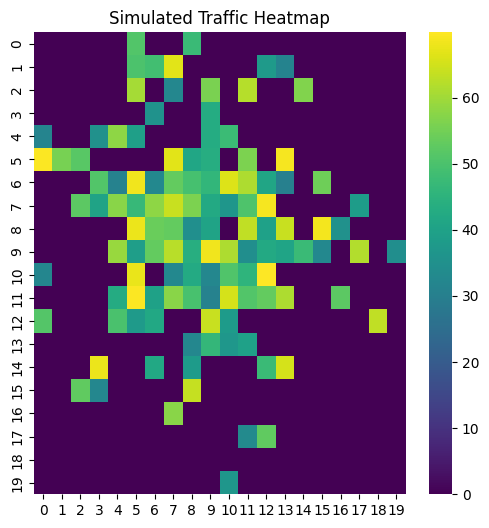

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(heatmap, cmap='viridis')
plt.title("Simulated Traffic Heatmap")
plt.show()

In [ ]:
X, Y = [], []
sequence_len = 6  # use past 6 time steps to predict the next one

for i in range(len(traffic_df) - sequence_len):
    seq_heatmaps = []
    for j in range(sequence_len):
        row = traffic_df.iloc[i + j]
        sensor_values = row.drop(labels='timestamp').to_dict()
        heatmap = create_heatmap(
            sensor_values, sensor_grid_positions, grid_size=20)
        seq_heatmaps.append(heatmap)

    # Input: stack of 6 heatmaps (shape: 6x20x20)
    X.append(np.stack(seq_heatmaps))

    # Label: heatmap at next time
    next_row = traffic_df.iloc[i + sequence_len]
    next_values = next_row.drop(labels='timestamp').to_dict()
    Y.append(create_heatmap(next_values, sensor_grid_positions, grid_size=20))

# Convert to numpy arrays
X = np.array(X)  # Shape: (samples, 6, 20, 20)
Y = np.array(Y)  # Shape: (samples, 20, 20)

In [36]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt


def build_model(hp):
    model = keras.Sequential()

    # Input shape: (sequence_len, height, width, 1)
    model.add(layers.Input(shape=(6, 20, 20, 1)))

    # First Conv3D Layer
    model.add(layers.Conv3D(
        filters=hp.Choice('filters_1', values=[16, 32, 64]),
        kernel_size=(2, 3, 3),
        activation='relu',
        padding='same'
    ))

    # Optional second Conv3D Layer
    model.add(layers.Conv3D(
        filters=hp.Choice('filters_2', values=[16, 32, 64]),
        kernel_size=(2, 3, 3),
        activation='relu',
        padding='same'
    ))

    # Flatten and Dense output
    model.add(layers.Flatten())
    model.add(layers.Dense(400, activation='relu'))  # 20x20 = 400
    model.add(layers.Dense(400, activation='linear'))  # Final output layer

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("lr", [1e-2, 1e-3, 1e-4])
        ),
        loss="mse",
        metrics=["mae"]
    )

    return model

/Users/hariprasannaa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [38]:
# Reshape input for Conv3D: (samples, 6, 20, 20) → (samples, 6, 20, 20, 1)
X_reshaped = X[..., np.newaxis]
Y_flat = Y.reshape((Y.shape[0], -1))  # Flatten 20x20 → 400

In [39]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
    directory='tuning_logs',
    project_name='traffic_cnn'
)

tuner.search(X_reshaped, Y_flat, epochs=10, validation_split=0.2)

# Best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 00m 27s]
val_loss: 74.85472106933594

Best val_loss So Far: 49.33762741088867
Total elapsed time: 00h 01m 22s


/Users/hariprasannaa/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [40]:
loss, mae = best_model.evaluate(X_reshaped, Y_flat)
print("Test Loss:", loss)
print("MAE:", mae)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 47.6428 - mae: 4.5567 
Test Loss: 47.72064208984375
MAE: 4.562995910644531


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


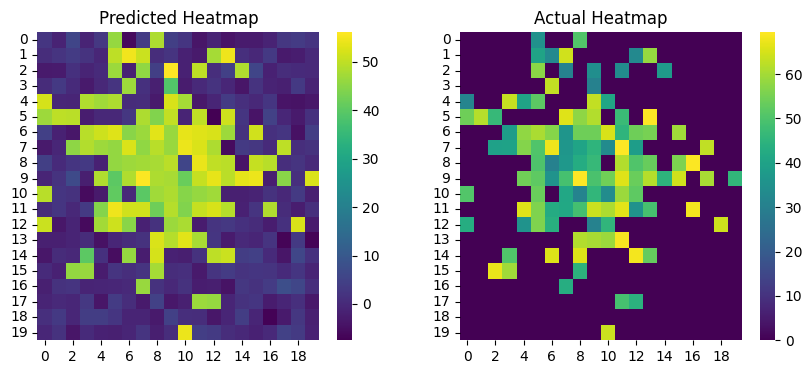

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

pred = best_model.predict(X_reshaped[0:1])[0].reshape(20, 20)
actual = Y[0]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(pred, cmap="viridis")
plt.title("Predicted Heatmap")

plt.subplot(1, 2, 2)
sns.heatmap(actual, cmap="viridis")
plt.title("Actual Heatmap")

plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

heatmaps_flat = X.reshape(X.shape[0], -1)  # shape: (samples, 6*20*20)
scaler = StandardScaler()
heatmaps_scaled = scaler.fit_transform(heatmaps_flat)

In [43]:
from sklearn.cluster import KMeans

k = 3  # Try 3 clusters: light, moderate, heavy traffic
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(heatmaps_scaled)

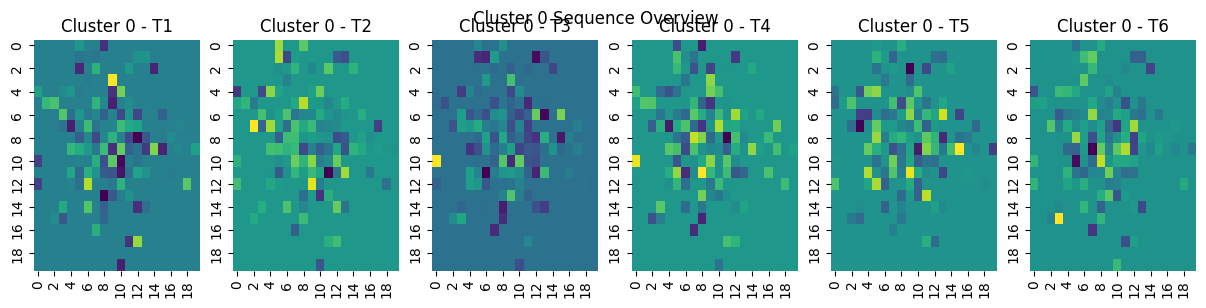

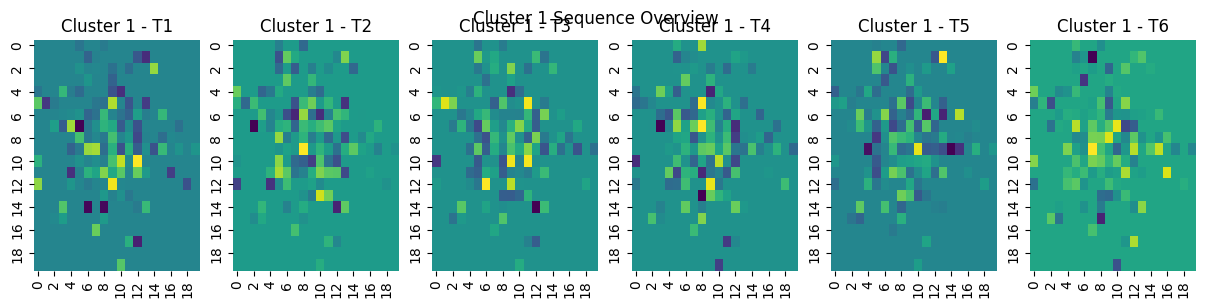

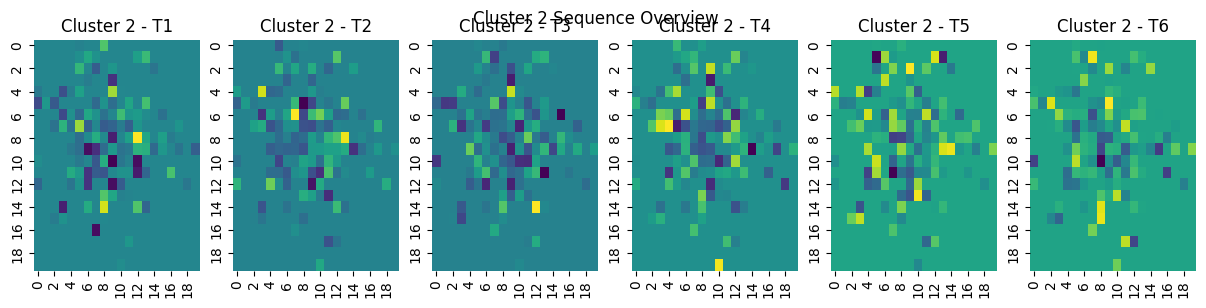

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cluster_centers = kmeans.cluster_centers_.reshape(k, 6, 20, 20)

for i in range(k):
    plt.figure(figsize=(15, 3))
    for t in range(6):
        plt.subplot(1, 6, t + 1)
        sns.heatmap(cluster_centers[i, t], cmap='viridis', cbar=False)
        plt.title(f'Cluster {i} - T{t+1}')
    plt.suptitle(f"Cluster {i} Sequence Overview")
    plt.show()

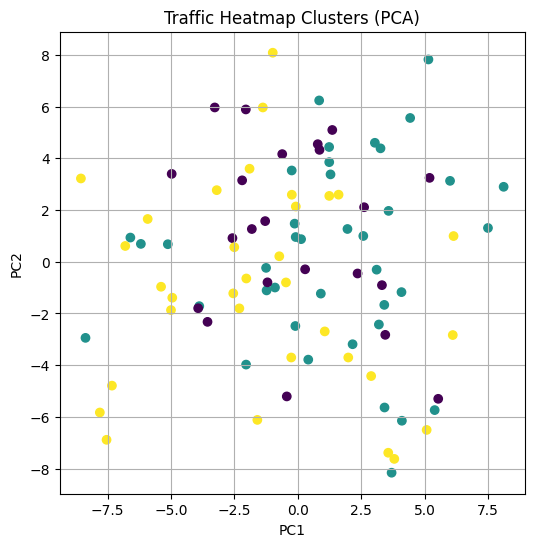

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(heatmaps_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='viridis')
plt.title("Traffic Heatmap Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

cnn_mse = mean_squared_error(actual.flatten(), pred.flatten())
print(f"CNN MSE: {cnn_mse:.2f}")

CNN MSE: 44.97


In [ ]:
# KMeans was trained on X.reshape(samples, -1)
# cluster_centers_: shape (k, flattened vector)
# Y: ground truth heatmaps (samples, 20, 20)

from sklearn.metrics import mean_squared_error

unsup_mse_list = []

for i in range(len(Y)):
    # Flatten X[i] to get same format as KMeans input
    x_seq_flat = X[i].flatten().reshape(1, -1)

    # Predict cluster
    cluster_id = kmeans.predict(x_seq_flat)[0]

    # Get cluster center
    cluster_center = kmeans.cluster_centers_[cluster_id]  # shape: (6*20*20,)

    # For fair comparison, let's take the LAST heatmap from cluster center
    cluster_center_reshaped = cluster_center.reshape(
        6, 20, 20)[-1]  # pick last timestep

    # Compute MSE vs. actual Y[i]
    mse = mean_squared_error(Y[i].flatten(), cluster_center_reshaped.flatten())
    unsup_mse_list.append(mse)

# Final unsupervised MSE
unsup_mse = np.mean(unsup_mse_list)
print(f"KMeans (Unsupervised) MSE: {unsup_mse:.4f}")

KMeans (Unsupervised) MSE: 776.3076
